In [1]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# step1:Importing the file

In [2]:
d1 = pd.read_csv("delivery_time.csv")
d1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
#Here from the above data set the Delivery time was the Target variable

# step:2 EDA

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
d1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
d1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
# Check for missing values
print("Missing values:\n", d1.isnull().sum())


Missing values:
 Delivery Time    0
Sorting Time     0
dtype: int64


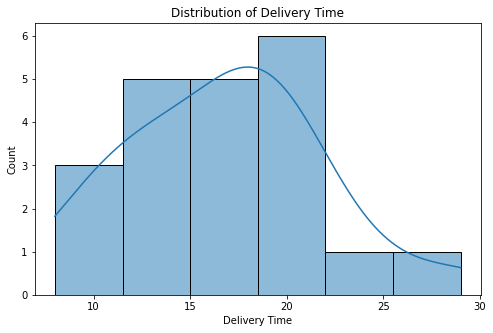

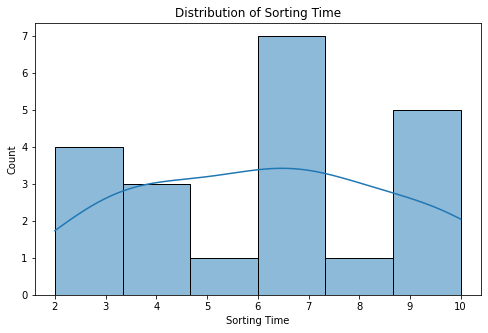

In [8]:
# Univariate analysis - distribution of each numerical variable
for column in d1.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(d1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


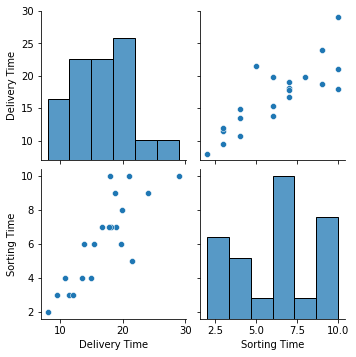

In [9]:
# Bivariate analysis - scatter plots for numerical variables
sns.pairplot(d1.select_dtypes(include='number'))
plt.show()

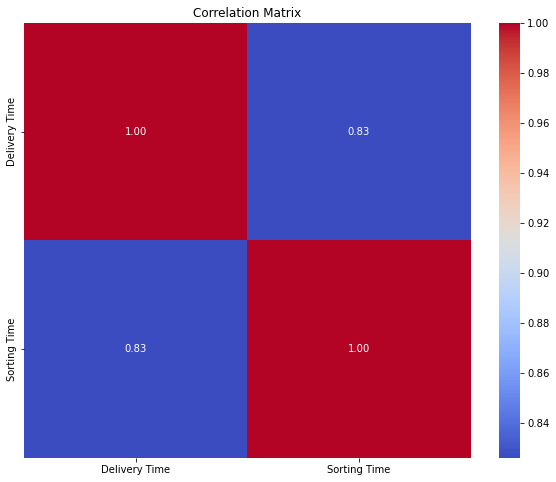

In [10]:
# Correlation matrix
correlation_matrix = d1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [22]:
d1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


# step3:Perfoming Linear Regression model

In [38]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
deliverytime = d1['Delivery Time'].values.reshape(-1, 1)  # Reshape to a 2D array
sortingtime = d1['Sorting Time']
model=LinearRegression()


In [42]:
model.fit(deliverytime,sortingtime)

LinearRegression()

In [43]:
model.intercept_

-0.7566733660351286

In [44]:
model.coef_

array([0.41374363])

In [46]:
model.predict(np.array([[10]]))

array([3.38076291])

In [47]:
y_pred=model.predict(deliverytime)
y_pred

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

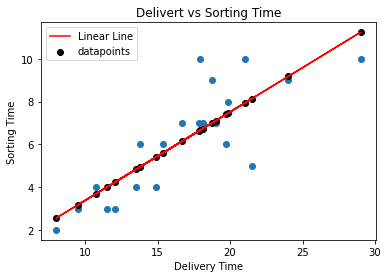

In [48]:
plt.scatter(deliverytime,sortingtime)
plt.scatter(deliverytime,y_pred,c='black',label='datapoints')
plt.plot(deliverytime,y_pred,c='red',label='Linear Line')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('Delivert vs Sorting Time')
plt.legend()
plt.show()

In [49]:
mean_squared_error(sortingtime,y_pred).round(2)

1.96

In [50]:
np.sqrt(mean_squared_error(sortingtime,y_pred)).round(2)

1.4

In [51]:
deliverytime.min()

8.0

In [52]:
deliverytime.max()

29.0

# predict delivery time


In [53]:
model.predict(deliverytime)

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

In [54]:
model.predict(np.array([[30]]))

array([11.65563548])

# qUESTION -2
Salary_hike -> Build a prediction model for Salary_hike uild a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
d2 = pd.read_csv("Salary_Data.csv")
d2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Perfoming EDA

In [57]:
d2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [58]:
d2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [60]:
d2.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [62]:
d2.nunique()

YearsExperience    28
Salary             30
dtype: int64

(array([3., 1., 1., 1., 3., 2., 3., 1., 3., 0., 2., 0., 2., 0., 1., 1., 2.,
        1., 1., 2.]),
 array([ 1.1 ,  1.57,  2.04,  2.51,  2.98,  3.45,  3.92,  4.39,  4.86,
         5.33,  5.8 ,  6.27,  6.74,  7.21,  7.68,  8.15,  8.62,  9.09,
         9.56, 10.03, 10.5 ]),
 <BarContainer object of 20 artists>)

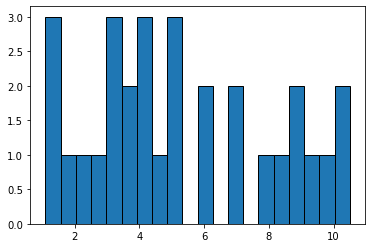

In [64]:
plt.hist(d2['YearsExperience'],edgecolor = 'black',bins=20)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

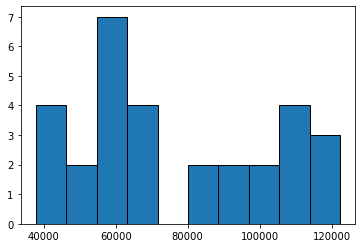

In [66]:
plt.hist(d2['Salary'],edgecolor="black",bins=10)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

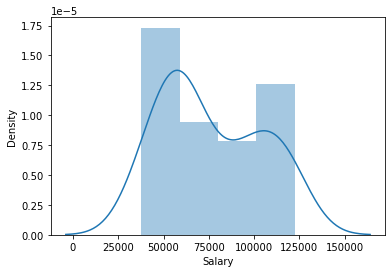

In [67]:
sns.distplot(d2['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2d8ce788b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2d8cdd08be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d8ce788c70>],
 'medians': [<matplotlib.lines.Line2D at 0x2d8cdd397c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d8cdd39b50>],
 'means': []}

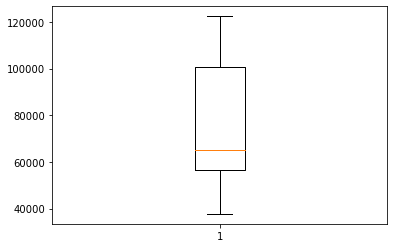

In [69]:
plt.boxplot(d2['Salary'])


In [70]:
d2.shape

(30, 2)

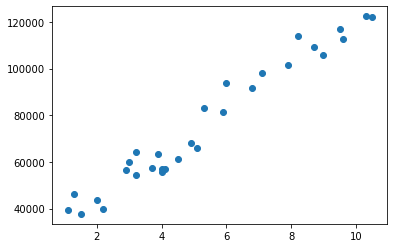

In [73]:
plt.scatter(d2['YearsExperience'],d2['Salary'])
plt.show()

# Performing Linear Regression model

In [75]:
YearsExperience = d2['YearsExperience'].values.reshape(-1, 1)  # Reshape to a 2D array
Salary = d2['Salary']
model=LinearRegression()


LinearRegression()

In [76]:
model.fit(YearsExperience,Salary)

LinearRegression()

In [77]:
model.intercept_

25792.20019866871

In [78]:
model.coef_

array([9449.96232146])

In [79]:
model.predict(np.array([[3]]))

array([54142.08716303])

In [80]:
y_pred=model.predict(YearsExperience)
y_pred

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

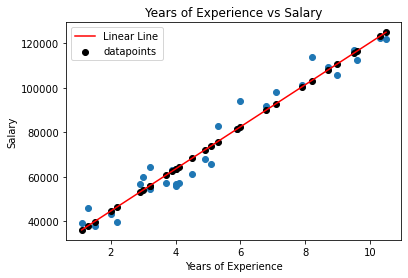

In [81]:
plt.scatter(YearsExperience,Salary)
plt.scatter(YearsExperience,y_pred,c='black',label='datapoints')
plt.plot(YearsExperience,y_pred,c='red',label='Linear Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()

In [82]:
mean_squared_error(Salary,y_pred).round(2)

31270951.72

In [83]:
np.sqrt(mean_squared_error(Salary,y_pred)).round(2)

5592.04

In [85]:
np.log(d2['YearsExperience'])   #for reducing the mean square error

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

# prediction

In [86]:
model.predict(YearsExperience)

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [87]:
model.predict(np.array([[3]]))

array([54142.08716303])